In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [7]:
Arbitrary value imputation is a technique used to handle missing data by replacing the missing values with arbitrary chosen values. Unlike statistical imputation methods such as mean, median, or mode imputation, arbitrary value imputation does not take into account the distribution or relationships within the data. Instead, it simply fills in missing values with predefined constants or values that are chosen without regard to the underlying data characteristics.

### How Arbitrary Value Imputation Works:

1. **Identify Missing Values:** Locate columns or variables in your dataset that contain missing values.

2. **Choose Arbitrary Values:** Select arbitrary values that will replace the missing values. These values can be chosen based on domain knowledge, common practice, or specific requirements of the dataset.

3. **Replace Missing Values:** Substitute the missing values with the chosen arbitrary values.

### Example:

Consider a dataset with a column representing monthly income, where some values are missing. Instead of using statistical measures like the mean or median income, arbitrary value imputation might replace all missing values with a fixed value such as 0 or a specific number like 9999. Here’s how you can apply arbitrary value imputation using Python and pandas:

```python
import pandas as pd
import numpy as np

# Sample data with missing values
data = {
    'Age': [25, 30, np.nan, 40, 35],
    'Income': [50000, np.nan, 60000, 70000, 80000]
}

df = pd.DataFrame(data)

# Arbitrary value imputation for missing 'Income' values
arbitrary_value = 99999  # Example arbitrary value

df['Income_arbitrary_imputed'] = df['Income'].fillna(arbitrary_value)

print("Original DataFrame:")
print(df[['Age', 'Income']])

print("\nDataFrame after arbitrary value imputation:")
print(df[['Age', 'Income_arbitrary_imputed']])
```

### Output:
```
Original DataFrame:
    Age   Income
0  25.0  50000.0
1  30.0      NaN
2   NaN  60000.0
3  40.0  70000.0
4  35.0  80000.0

DataFrame after arbitrary value imputation:
    Age  Income_arbitrary_imputed
0  25.0                   50000.0
1  30.0                   99999.0
2   NaN                   60000.0
3  40.0                   70000.0
4  35.0                   80000.0
```

### Considerations:

- **Impact on Data:** Arbitrary value imputation can distort statistical measures and relationships within the data because it does not consider the distribution or patterns of the existing values.
  
- **Applicability:** It is typically used when the missing data is believed to be missing completely at random (MCAR) or when the missing values are expected to have no particular meaning.

- **Alternatives:** Statistical imputation methods (e.g., mean, median, mode imputation) or more sophisticated techniques (e.g., predictive modeling-based imputation) may provide more accurate results by preserving the data distribution and relationships.

### Summary:

Arbitrary value imputation is a simple approach to handle missing data by replacing them with predefined constants or values. While easy to implement, it may not always be appropriate depending on the dataset and the nature of the missing values. Careful consideration of the data characteristics and potential impacts on analysis and modeling should guide the choice of imputation method.

SyntaxError: invalid syntax (<ipython-input-7-123e06a7cb27>, line 1)

In [9]:
df = pd.read_csv('titanic_toy.csv')

In [10]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [12]:
df.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [13]:
x = df.drop(columns = ['Survived'])

In [14]:
y = df['Survived']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [16]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [17]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [18]:
X_train.sample(5)


,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
829,62.0,80.0000,0,62.0,62.0,80.0000,80.0000
430,28.0,26.5500,0,28.0,28.0,26.5500,26.5500
105,28.0,7.8958,0,28.0,28.0,7.8958,7.8958
157,30.0,8.0500,0,30.0,30.0,8.0500,8.0500
104,37.0,7.9250,2,37.0,37.0,7.9250,7.9250


In [20]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99  imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1  imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after 99  imputation:  951.7275570187188
Age Variance after -1 imputation:  318.0896202624488
Original Fare variable variance:  2448.1979137063163
Fare Variance after 999 imputation:  47219.202652176304
Fare Variance after -1  imputation:  2378.5676784883494


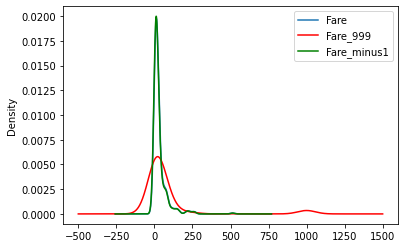

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [24]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [25]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


In [32]:
#NOW LETS DO IT FAST WITH SKLEARN
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [33]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [34]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [35]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [36]:
trf.named_transformers_['imputer1'].statistics_


array([99.])

In [37]:
trf.named_transformers_['imputer2'].statistics_


array([999.])

In [38]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [39]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])